# Scam Call Data Analysis



## Progress Report


##### Description

1. An introduction part to your data:
    1. Data spec: describe your data. Include the format and any assumptions about your data, size of the dataset
    2. A link to your full data in downloadable form, you can keep your data on Google Drive, Box, DropBox, GitHub, or personal website
    3. A sample of your data ( n = 10 - 50)

2. A report of your data collection process
    1. How did you collect your data
    2. How did you clean your data
    3. Mention any difficulties you faced in the beginning steps
3. A summary of challenges and observations you have made so far. 
4. A brief mention of your next steps and what you plan to do with your data as you move into the analysis (If you are already in the analysis phase you can mention that as well)
5. Group member duties

### Part 1

##### A. Data specifications
   Our data is collected by the *Federal Communications Comission* (**FCC**). It consists of voluntarily reported unwanted calls in the US. The dataset contains *12 columns* that contain data on every specific report. These columns show data on: *date, time, form (mostly by phone), method (internet, wired, mobile), numbers involved and location*. There's a good amount of entries, *1.08 million*, since the data collection began 6 years ago, but there's a good amount of unusable rows. Some rows are completely empty, lack location or other essential information for our study. 
    
   We assume there will be some bias involved. Reports are done voluntarily, and there's a chance the report is not a spam call at all since there's no method of confirmation
   
##### B. Dataset links:  
   
1. [Original Source](https://opendata.fcc.gov/Consumer/Consumer-Complaints-Data-Unwanted-Calls/vakf-fz8e)
2. [Our drive](https://drive.google.com/drive/folders/1Yr5hVtv3-NM5uaYz2zje11CGl42mtQw_?usp=sharing) (Only accessible by UIC email)
3. [Github Repository](https://github.com/lvicen3/Scam_Data_Analysis) (Does not contain dataset)

##### C. Sample:
   

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from utils import *
from datetime import datetime

In [11]:
raw_df = pd.read_csv('data/FCC_reported_calls.csv')
raw_df.head(n=20)

,Ticket ID,Date of Issue,Time of Issue,Form,Method,Issue,Caller ID Number,Type of Call or Messge,Advertiser Business Number,State,Zip,Location (Center point of the Zip Code)
0,100358,01/26/2015,8:35 am,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,617-681-5500,Prerecorded Voice,NaN,WA,98115,"WA 98115\n(47.685291, -122.297534)"
1,157640,03/02/2015,2:16 p.m.,Phone,Wired,Telemarketing (including do not call and spoof...,NaN,Prerecorded Voice,NaN,CO,80138,"CO 80138\n(39.518092, -104.688882)"
2,104244,01/28/2015,11:00 AM,Phone,Wireless (cell phone/other mobile device),Robocalls,415-964-2785,Prerecorded Voice,NaN,FL,33139,"FL 33139\n(25.783695, -80.141739)"
3,153519,02/27/2015,11:31 AM,Phone,Wired,Robocalls,404-381-1115,Prerecorded Voice,NaN,VA,22182,"VA 22182\n(38.932908, -77.267432)"
4,145971,02/23/2015,3:24 P.M.,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,203-204-2992,Live Voice,NaN,PA,17403,"PA 17403\n(39.935487, -76.710483)"
5,1019470,06/06/2016,9:35 am,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,512-640-3695,Live Voice,NaN,TX,78666,"TX 78666\n(29.875413, -97.957509)"
6,164185,03/05/2015,4:56 p.m.,Phone,Internet (VOIP),Robocalls,208-646-8795,Prerecorded Voice,NaN,FL,32763,"FL 32763\n(28.943537, -81.301205)"
7,148429,02/24/2015,4:47 p.m.,Phone,Wired,Telemarketing (including do not call and spoof...,NaN,Live Voice,NaN,OH,43009,"OH 43009\n(40.168171, -83.64174)"
8,156024,02/27/2015,10:37 am,Phone,Wireless (cell phone/other mobile device),Robocalls,208-281-6548,Prerecorded Voice,NaN,IL,60148,"IL 60148\n(41.873394, -88.016484)"
9,15333,11/24/2014,10:31 am,Phone,Wireless (cell phone/other mobile device),Telemarketing (including do not call and spoof...,NaN,Live Voice,NaN,WA,98682,"WA 98682\n(45.670446, -122.508465)"


### Part 2

##### A. Data collection
We collected our data directly from the [**FCC**](https://opendata.fcc.gov/) open data website. The original reports are collected through either [this website](https://consumercomplaints.fcc.gov/hc/en-us) or via phonecall. The report is processed before entered into the dataset itself.

##### B. Data cleaning
We are going to be dropping some redundant features and ones that do not help in our analysis
Reasons to drop each column:
    `Form`: all entries are 'phone'
    `Advertiser Business Number`: We do not see a use for now
    `Location`: This is a calculated column using center coordinates for the zip-code. We might add it in later, but seems redundant with the existence of state and zip-code already there

We're combining `Date of Issue` and `Time of Issue` into `DateTime` for easier processing. Then splitting that column into `month`, `day`, `year`, `hour`, and `minutes` because these are easier to graph for an EDA. We'll keep `DateTime` since it might be the one we use for our models. 

Finally, `Method` and `Issue` will be parsed to make them more readable. Some entries contain unnecesary parenthesis and extra information.

See [repo](https://github.com/lvicen3/Scam_Data_Analysis) for complete code including helper functions used here.

In [6]:
# Drop unused columns
fcc_df = raw_df.drop(columns=['Form','Advertiser Business Number','Location (Center point of the Zip Code)'])

# Create a single date+time column
fcc_df['DateTime'] = fcc_df[['Date of Issue','Time of Issue']].apply(lambda row: parse_date(row.values[0],row.values[1]), axis=1)
fcc_df.drop(columns=['Date of Issue','Time of Issue'],inplace=True)

# Split up DateTime column
month, day, year, hour, minute = zip(*[(None, None, None, None, None) if dt is None else (dt.month, dt.day, dt.year, dt.hour, dt.minute) for dt in fcc_df['DateTime']])
fcc_df = fcc_df.assign(Month = month, Day = day, Year = year, Hour = hour, Minute = minute)

# Simply string entries for Method and Issue
fcc_df['Method'] = fcc_df['Method'].apply(func=remove_parenthesis)
fcc_df['Issue'] = fcc_df['Issue'].apply(func=remove_parenthesis)

fcc_df.head(20)

,Ticket ID,Method,Issue,Caller ID Number,Type of Call or Messge,State,Zip,DateTime,Month,Day,Year,Hour,Minute
0,100358,Wireless,Telemarketing,617-681-5500,Prerecorded Voice,WA,98115,2015-01-26 20:35:00,1,26,2015,20,35
1,157640,Wired,Telemarketing,NaN,Prerecorded Voice,CO,80138,2015-03-02 14:16:00,3,2,2015,14,16
2,104244,Wireless,Robocalls,415-964-2785,Prerecorded Voice,FL,33139,2015-01-28 23:00:00,1,28,2015,23,0
3,153519,Wired,Robocalls,404-381-1115,Prerecorded Voice,VA,22182,2015-02-27 23:31:00,2,27,2015,23,31
4,145971,Wireless,Telemarketing,203-204-2992,Live Voice,PA,17403,2015-02-23 15:24:00,2,23,2015,15,24
5,1019470,Wireless,Telemarketing,512-640-3695,Live Voice,TX,78666,2016-06-06 21:35:00,6,6,2016,21,35
6,164185,Internet,Robocalls,208-646-8795,Prerecorded Voice,FL,32763,2015-03-05 16:56:00,3,5,2015,16,56
7,148429,Wired,Telemarketing,NaN,Live Voice,OH,43009,2015-02-24 16:47:00,2,24,2015,16,47
8,156024,Wireless,Robocalls,208-281-6548,Prerecorded Voice,IL,60148,2015-02-27 22:37:00,2,27,2015,22,37
9,15333,Wireless,Telemarketing,NaN,Live Voice,WA,98682,2014-11-24 22:31:00,11,24,2014,22,31


#### C. Difficulties
The dataset is massive and it's hard to gage the amount of unusable data and bad entries, which makes the process a little abstract and harder to grasp as we clean through the data.

### Part 3
#### Challenges

We're still in the process on working through our supplmentary datasets, like the [IRS'](https://github.com/lvicen3/Scam_Data_Analysis). This dataset requires a lot more time as it contains information outside of our bailiwick and an innumerable amount of columns. We're not sure this dataset might even be the best to use infer demographical data to compare with our FCC dataset, so we might have to search for a different one in the future

### Part 4
#### Plans
Some basic exploratory data analysis has be done. We've taken a look a call frequency depending on time of day, month, through the years etc... Here are some examples:

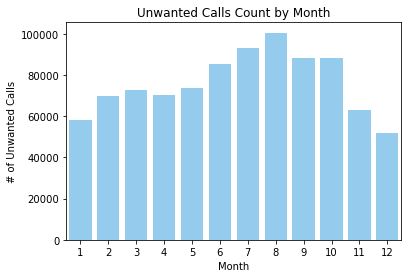

In [16]:
# Month by month
cp = sns.countplot(data=fcc_df,x='Month',color='lightskyblue',order = range(1,13))
cp.set(xlabel='Month', ylabel='# of Unwanted Calls')
plt.title('Unwanted Calls Count by Month')
plt.show()

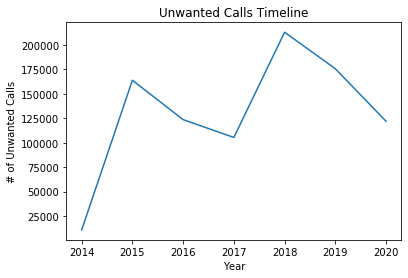

In [17]:
# Year by year timeline
year_count = fcc_df.groupby(['Year']).count()['Ticket ID']
year_count = year_count[year_count > 2000]
ln = sns.lineplot(x=year_count.index,y=year_count.values)
ln.set(xlabel='Year', ylabel='# of Unwanted Calls')
plt.title('Unwanted Calls Timeline')
plt.show()

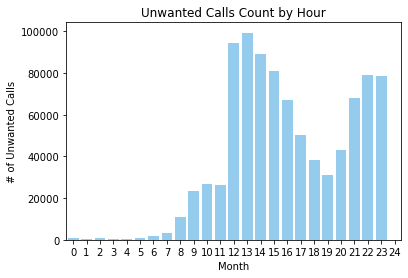

In [18]:
# Hour count
cp = sns.countplot(data=fcc_df,x='Hour',order = range(25),color='lightskyblue')
cp.set(xlabel='Month', ylabel='# of Unwanted Calls')
plt.title('Unwanted Calls Count by Hour')
plt.show()



We plan on looking into interesting ways to display our location based data through the use of a [plotpy open source library](https://plotly.com/python/maps/). Later on, we'll take a look at connections with other demographical datasets, such as the IRS'. Then we'll move on the Machine Learning part. Modeling by splitting train-test and decide/optimize hyperparameters.

### PART 5
#### Member Duties

Angela Timochina:  Data Visualization, Code Reviewer, Model Testing.

Filmon Ghebremeskel:  Data collection, Model Formation, Data Validation.

Lorenzo Vicente: Data Cleaning, Model & DataFrame Formation.